<a href="https://colab.research.google.com/github/saquibali7/MultiModalHateDetection/blob/main/MultimodalHateSpeech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
import cv2
import torch

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
HateSpeech = "/content/drive/MyDrive/hateSpeechDetection/Hate Speech"
NoHateSpeech = "/content/drive/MyDrive/hateSpeechDetection/No Hate Speech"


In [4]:
HateImages = os.listdir(HateSpeech)
NotHateImages = os.listdir(NoHateSpeech)
print(len(HateImages), len(NotHateImages))

1942 1658


In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 38 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 3s (1,691 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [ ]:
import pytesseract
import shutil
import random
from pytesseract import pytesseract

In [ ]:
def extract_text(path):
  image_path=path
  extractedInformation = pytesseract.image_to_string(Image.open(image_path))
  return extractedInformation



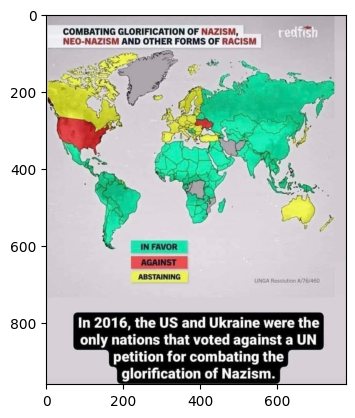

In [ ]:
images = os.listdir(HateSpeech)
idx = random.randint(0,len(images))
img_path = os.path.join(HateSpeech,images[idx])
img = Image.open(img_path)
img = np.array(img)
# img = cv2.resize(img, (256,256))
plt.imshow(img)

In [ ]:
text = extract_text(img_path)
print(text)
text = text.lower()
text = text.split(' ')
print(text)

COMBATING GLORIFICATION OF NAZISM,
NEO-NAZISM AND OTHER FORMS OF RACISM

 

In 2016, the US and Ukraine were the
MLC M UCLA Cer ler lila Be)
petition for combating the
glorification of Nazism.

   
       
   

['combating', 'glorification', 'of', 'nazism,\nneo-nazism', 'and', 'other', 'forms', 'of', 'racism\n\n', '\n\nin', '2016,', 'the', 'us', 'and', 'ukraine', 'were', 'the\nmlc', 'm', 'ucla', 'cer', 'ler', 'lila', 'be)\npetition', 'for', 'combating', 'the\nglorification', 'of', 'nazism.\n\n', '', '', '\n', '', '', '', '', '', '', '\n', '', '', '\n\x0c']


In [ ]:
for _ in range(5):
  dx = random.randint(0,len(images))
  img_path = os.path.join(HateSpeech,images[idx])
  img = Image.open(img_path)
  img = np.array(img)
  print(img.shape)

(960, 778, 3)
(960, 778, 3)
(960, 778, 3)
(960, 778, 3)
(960, 778, 3)


## Text PreProcessing

In [ ]:
!pip install 'portalocker>=2.0.0'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torchtext
from torchtext.data import get_tokenizer
tokenizer = get_tokenizer("basic_english")
from torchtext.datasets import AG_NEWS
train_iter = iter(AG_NEWS(split='train'))

In [ ]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = get_tokenizer('basic_english')
train_iter = AG_NEWS(split='train')

def yield_tokens(data_iter):
    for _, text in data_iter:
      yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(train_iter), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

In [ ]:
preprocess_text=[]

def preprocess(path):
  for img in os.listdir(path):
    img_path = os.path.join(path,img)
    extracted_text = extract_text(img_path)
    extracted_text = extracted_text.lower()
    extracted_text = extracted_text.split(' ')
    extracted_tokens=vocab(extracted_text)
    preprocess_text.append(extracted_tokens)



In [ ]:
# preprocess(HateSpeech)
# preprocess(NoHateSpeech)

In [ ]:
%cd "/content/drive/MyDrive/hateSpeechDetection/"

In [ ]:
import pickle as pkl

# path = "/content/drive/MyDrive/hateSpeechDetection/"
# fileName = path + 'preprocess_text'
# fileObject = open(fileName, 'wb')

# pkl.dump(preprocess_text, fileObject)
# fileObject.close()

In [ ]:
extracted_sentence = []

def preprocess_sentence(path):
  for img in os.listdir(path):
    img_path = os.path.join(path,img)
    extracted_text = extract_text(img_path)
    extracted_sentence.append(extracted_text)



In [ ]:
# preprocess_sentence(HateSpeech)
# preprocess_sentence(NoHateSpeech)

In [ ]:
# fileName = path + 'preprocess_sentence'
# fileObject = open(fileName, 'wb')

# pkl.dump(extracted_sentence, fileObject)
# fileObject.close()

## Text feature extraction Model

In [3]:
%cd "/content/drive/MyDrive/hateSpeechDetection/"

/content/drive/MyDrive/hateSpeechDetection


In [4]:
import pickle as pkl
file = open("preprocess_sentence.obj",'rb')
sentences = pkl.load(file)

In [5]:
!!pip install transformers 

['Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/',
 'Collecting transformers',
 '  Downloading transformers-4.30.1-py3-none-any.whl (7.2 MB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/7.2 MB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━\x1b\x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b3.2/7.2 MB\x1b \x1b96.6 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b\x1b╸\x1b \x1b7.2/7.2 MB\x1b \x1b141.7 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b7.2/7.2 MB\x1b \x1b84.0 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hRequirement already satisfied: filelock in /usr/local/lib/python3.10/dist-packages (from transformers) (3.12.0)',
 'Collecting huggingface-hub<1.0,>=0.14.1 (from transformers)',
 '  Downloading huggingface_hub-0.15.1-py3-none-any.whl (236 kB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
from transformers import DistilBertTokenizer, DistilBertModel

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained("distilbert-base-uncased")
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
output = output.last_hidden_state[:,0,:]
print(output.shape)

torch.Size([1, 768])


In [38]:
preprocess_texts_tokens=[]
errors = []

for i in range(len(sentences)):
  if(len(sentences[i])>=1000):
    errors.append(i)
    continue
  encoded_input = tokenizer(sentences[i], return_tensors='pt')
  output = model(**encoded_input)
  output = output.last_hidden_state[:,0,:]
  preprocess_texts_tokens.append(output)

In [39]:
print(len(preprocess_texts_tokens))

3542


In [41]:
path = "/content/drive/MyDrive/hateSpeechDetection/"
fileName = path + 'preprocess_texts_tokens'
fileObject = open(fileName, 'wb')

pkl.dump(preprocess_texts_tokens, fileObject)
fileObject.close()

In [51]:
print(errors)

[81, 261, 394, 401, 512, 711, 737, 861, 959, 1060, 1072, 1269, 1294, 1315, 1370, 1442, 1468, 1493, 1584, 2029, 2049, 2073, 2095, 2098, 2124, 2127, 2162, 2287, 2313, 2346, 2405, 2486, 2514, 2585, 2634, 2664, 2780, 2781, 2855, 2900, 2957, 3052, 3095, 3118, 3155, 3218, 3260, 3277, 3349, 3351, 3353, 3356, 3357, 3390, 3397, 3465, 3499, 3529]


In [50]:
fileName = path + 'errors'
fileObject = open(fileName, 'wb')

pkl.dump(errors, fileObject)
fileObject.close()